### Modelo preditivo para aprovação de crédito

Modelos de score de crédito calculam a probabilidade de inadimplência e são uma das
principais ferramentas utilizadas por diversas empresas para aprovar ou negar um crédito.
O objetivo deste desafio é criar um modelo preditivo calculando a probabilidade de
inadimplência de cada novo pedido de crédito.

As variáveis da base de dados são descritas abaixo:

● idade: A idade do cliente.

● numero_de_dependentes: O número de pessoas dependentes do cliente.

● salario_mensal: Salário mensal do cliente.

● numero_emprestimos_imobiliarios: Quantidade de empréstimos imobiliários que o cliente possui em aberto.

● numero_vezes_passou_90_dias: Número de vezes que o tomador passou mais de 90 dias em atraso.

● util_linhas_inseguras: Quanto que o cliente está usando, relativamente ao limite dele, de linhas de crédito que não são seguradas por qualquer bem do tomador e.g: imoveis, carros etc. 

● vezes_passou_de_30_59_dias: Número de vezes que o cliente atrasou, entre 30 e 59 dias, o pagamento de um empréstimo.

● razao_debito: Razão entre as dívidas e o patrimônio do tomador. razão débito = Dividas/Patrimônio

● numero_linhas_crdto_aberto: Número de empréstimos em aberto pelo cliente.

● numero_de_vezes_que_passou_60_89_dias: Número de vezes que o cliente atrasou, entre 60 e 89 dias, o pagamento de um empréstimo.

#### Importando Bibliotecas e Arquivo de Treino

In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
#importando o arquivo de treino
df_treino = pd.read_csv('treino.csv', sep=',', encoding='utf-8')

In [3]:
#5 primeiras linhas
df_treino.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Verificação de tamanho e tipo

In [4]:
#shape do arquivo (linhas x colunas)
df_treino.shape

(110000, 11)

In [5]:
#verificando os tipos de dados de cada coluna
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 11 columns):
inadimplente                             110000 non-null int64
util_linhas_inseguras                    110000 non-null float64
idade                                    110000 non-null int64
vezes_passou_de_30_59_dias               110000 non-null int64
razao_debito                             110000 non-null float64
salario_mensal                           88237 non-null float64
numero_linhas_crdto_aberto               110000 non-null int64
numero_vezes_passou_90_dias              110000 non-null int64
numero_emprestimos_imobiliarios          110000 non-null int64
numero_de_vezes_que_passou_60_89_dias    110000 non-null int64
numero_de_dependentes                    107122 non-null float64
dtypes: float64(4), int64(7)
memory usage: 9.2 MB


#### Tratamento de linhas vazias  

In [6]:
#verificando se há linhas vazias
df_treino.isnull().sum()

inadimplente                                 0
util_linhas_inseguras                        0
idade                                        0
vezes_passou_de_30_59_dias                   0
razao_debito                                 0
salario_mensal                           21763
numero_linhas_crdto_aberto                   0
numero_vezes_passou_90_dias                  0
numero_emprestimos_imobiliarios              0
numero_de_vezes_que_passou_60_89_dias        0
numero_de_dependentes                     2878
dtype: int64

#### Tratamento de linhas vazias da coluna numero_de_dependentes

In [7]:
#verificando a quantidade de valores únicos da coluna numero_de_dependentes
print(df_treino['numero_de_dependentes'].sort_values().unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 20. nan]


In [8]:
#quantidade total de valores pela coluna numero de dependentes
dependentes = df_treino['numero_de_dependentes'].value_counts()
print(dependentes)

0.0     63652
1.0     19416
2.0     14306
3.0      6898
4.0      2111
5.0       563
6.0       115
7.0        38
8.0        16
10.0        4
9.0         2
20.0        1
Name: numero_de_dependentes, dtype: int64


In [9]:
df_treino['numero_de_dependentes'].fillna(value=0,inplace=True)

In [10]:
print(df_treino['numero_de_dependentes'].sort_values().unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 20.]


In [11]:
print(dependentes)

0.0     63652
1.0     19416
2.0     14306
3.0      6898
4.0      2111
5.0       563
6.0       115
7.0        38
8.0        16
10.0        4
9.0         2
20.0        1
Name: numero_de_dependentes, dtype: int64


In [12]:
#retirando da base as linhas com numero de dependentes maior que 5
df_tratado = df_treino.loc[df_treino['numero_de_dependentes'] < 5]
df_tratado.shape

(109261, 11)

In [13]:
print(df_tratado['numero_de_dependentes'].sort_values().unique())

[0. 1. 2. 3. 4.]


#### Tratamento de linhas vazias da coluna salario_mensal

In [14]:
df_tratado = df_tratado.loc[df_tratado['salario_mensal'] > 100.0]

In [15]:
#verificando a quantidade de valores únicos da coluna numero_de_dependentes

#analisando a média salarial
media = df_tratado['salario_mensal'].mean()
print(media)

6750.896749700125


In [16]:
#analisando a mediana dos salários
mediana = df_tratado['salario_mensal'].median()
print(mediana)

5448.0


In [17]:
df_tratado.shape

(85869, 11)

In [18]:
df_tratado['salario_mensal'].fillna(value=mediana,inplace=True)

In [19]:
df_tratado.isnull().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [20]:
df_tratado.shape

(85869, 11)

#### Análise de Dados

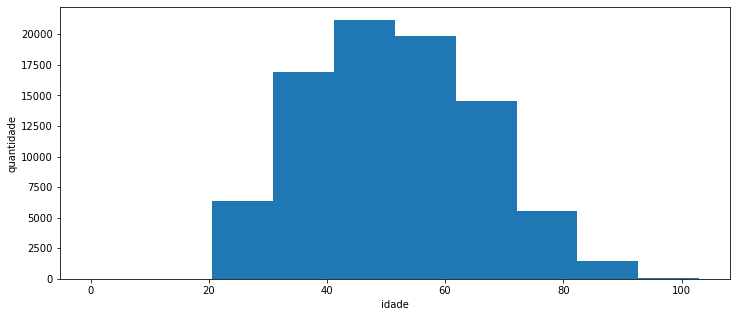

In [21]:
#verificando a distribuição das idades 
plt.figure(figsize=(12,5))
plt.hist(df_tratado['idade'])
plt.xlabel('idade')
plt.ylabel('quantidade')
plt.show()

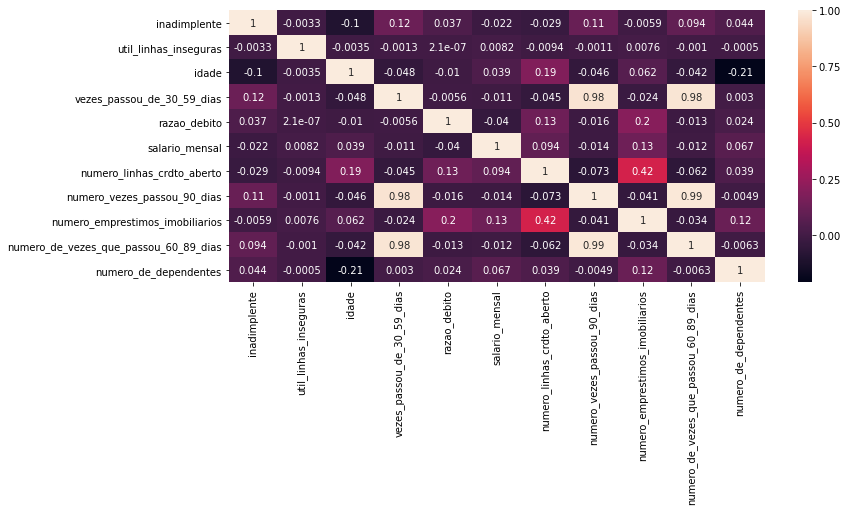

In [22]:
#verificando a correlação entre os dados
plt.figure(figsize=(12,5))
corr = df_tratado.corr()
sns.heatmap(corr, annot=True)
plt.show()

### Separando os dados na tabela de treino

In [31]:
x = df_tratado.loc[:, 'util_linhas_inseguras':]  
y = df_tratado.loc[:, 'inadimplente'] 

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Normalização de Dados

In [33]:
from sklearn.preprocessing import StandardScaler        
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Árvore de Decisão

In [34]:
clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

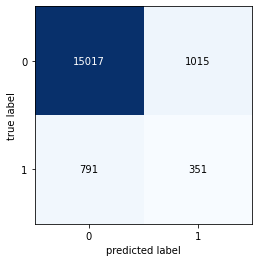

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     16032
           1       0.26      0.31      0.28      1142

    accuracy                           0.89     17174
   macro avg       0.60      0.62      0.61     17174
weighted avg       0.90      0.89      0.90     17174



In [116]:
test_score = clf.score(x_test, y_test)

print(test_score)

0.893618260160708


### Feature Importance

In [41]:
def compara_modelos(maxdepth):
    if maxdepth == 0:
        dt = DecisionTreeClassifier(random_state=1)
    else:
        dt = DecisionTreeClassifier(random_state=1, max_depth=maxdepth)
    clf.fit(x_train, y_train)    
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    return train_score,test_score

In [42]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1}         {} '.format(2,str(compara_modelos(2))))
print('{:1}         {} '.format(3,str(compara_modelos(3))))
print('{:1}         {} '.format(4,str(compara_modelos(4))))
print('{:1}         {} '.format(10,str(compara_modelos(10))))
print('{:1}         {} '.format(15,str(compara_modelos(15))))
print('{:1}         {} '.format('Full',str(compara_modelos(0))))

depth      Training score       Testing score       
-----      --------------       -------------       
2         (1.0, 0.8947828112262722) 
3         (1.0, 0.8955979969721672) 
4         (1.0, 0.8954815418656108) 
10         (1.0, 0.8953650867590544) 
15         (1.0, 0.8958891347385582) 
Full         (1.0, 0.893618260160708) 


Feature: 0, Score: 0.18707
Feature: 1, Score: 0.11497
Feature: 2, Score: 0.03946
Feature: 3, Score: 0.19105
Feature: 4, Score: 0.17257
Feature: 5, Score: 0.08440
Feature: 6, Score: 0.11577
Feature: 7, Score: 0.02679
Feature: 8, Score: 0.02748
Feature: 9, Score: 0.04043


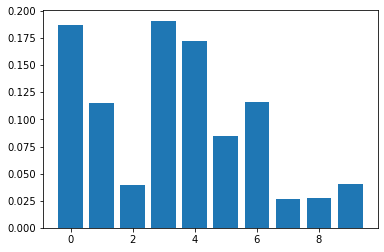

In [56]:
fi = clf.feature_importances_

for i,v in enumerate(fi):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(fi))], fi)
plt.show()

### Predição do Teste

In [89]:
df_teste = pd.read_csv('teste.csv', sep=',', encoding='utf-8')

In [90]:
df_teste.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


In [91]:
df_teste.shape

(40000, 10)

In [92]:
#verificando se está tudo ok com a base de teste
df_teste.isnull().sum()

util_linhas_inseguras                       0
idade                                       0
vezes_passou_de_30_59_dias                  0
razao_debito                                0
salario_mensal                           7968
numero_linhas_crdto_aberto                  0
numero_vezes_passou_90_dias                 0
numero_emprestimos_imobiliarios             0
numero_de_vezes_que_passou_60_89_dias       0
numero_de_dependentes                    1046
dtype: int64

In [93]:
print(df_teste['numero_de_dependentes'].sort_values().unique())

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 13. nan]


In [94]:
df_teste['numero_de_dependentes'].fillna(value=0,inplace=True)

In [95]:
df_previsao = df_teste.loc[df_teste['numero_de_dependentes'] < 5]

In [96]:
mediana_teste = df_previsao['salario_mensal'].median()
print(mediana_teste)

5400.0


In [98]:
df_previsao['salario_mensal'].fillna(value=mediana_teste,inplace=True)

C:\Users\Rachid Elihimas\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [101]:
#realizando a previsão
result = clf.predict(df_previsao)

In [106]:
#checando os resultados
result

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [107]:
df_previsao['inadimplente'] = result

C:\Users\Rachid Elihimas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
#imprimindo o novo arquivo
df_previsao.to_csv(r'C:\Users\Rachid Elihimas\Desktop\cases_datarisk 2\resposta.csv', index=False)

### Fim 